## By: Naresh Shewkani

## GRIP: The Sparks Foundation

## Data Science and Bussiness Analytics Intern

# Task 1 : Prediction using Supervised ML

Aim: To Predict the percentage of student based on the no. of study hours

Data Source: http://bit.ly/w-data

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing the data
student_data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


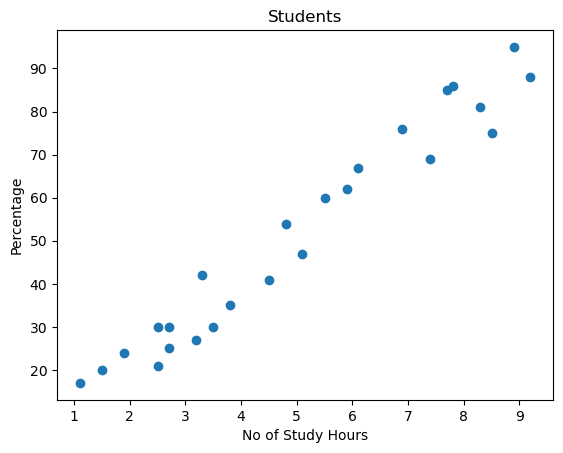

In [3]:
# Visualising the data using pyplot interface

fig, ax = plt.subplots()

ax.scatter(student_data.Hours, student_data.Scores)

ax.set(title="Students", xlabel="No of Study Hours", ylabel="Percentage");

The graph resembles a straight line and as only two variables are involved Linear Regression can be used for training the model

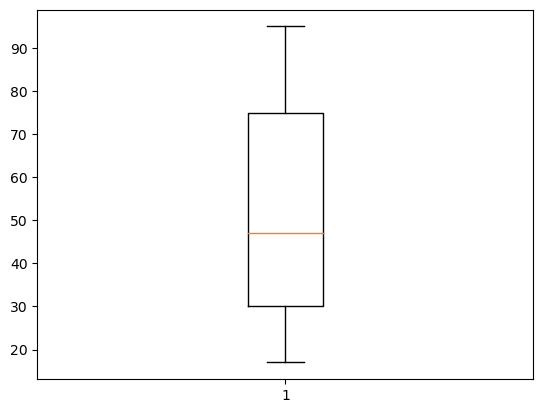

In [4]:
fig, ax = plt.subplots()

ax.boxplot(student_data.Scores);

Outliers are not present in the data

In [5]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


All entries are non - null, so there is no need of Data Cleaning

Let's look at distribution of data

### Density Plot

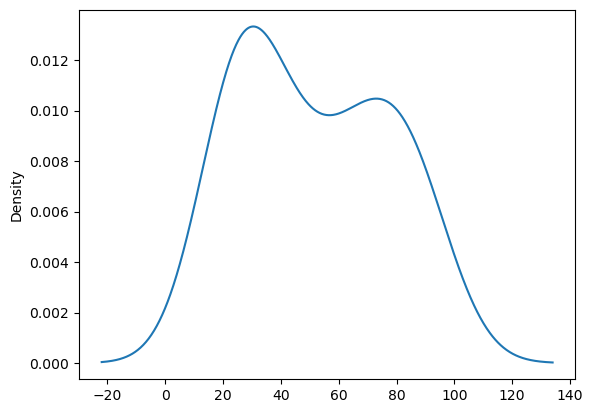

In [7]:
student_data.Scores.plot(kind='density');

### Histogram

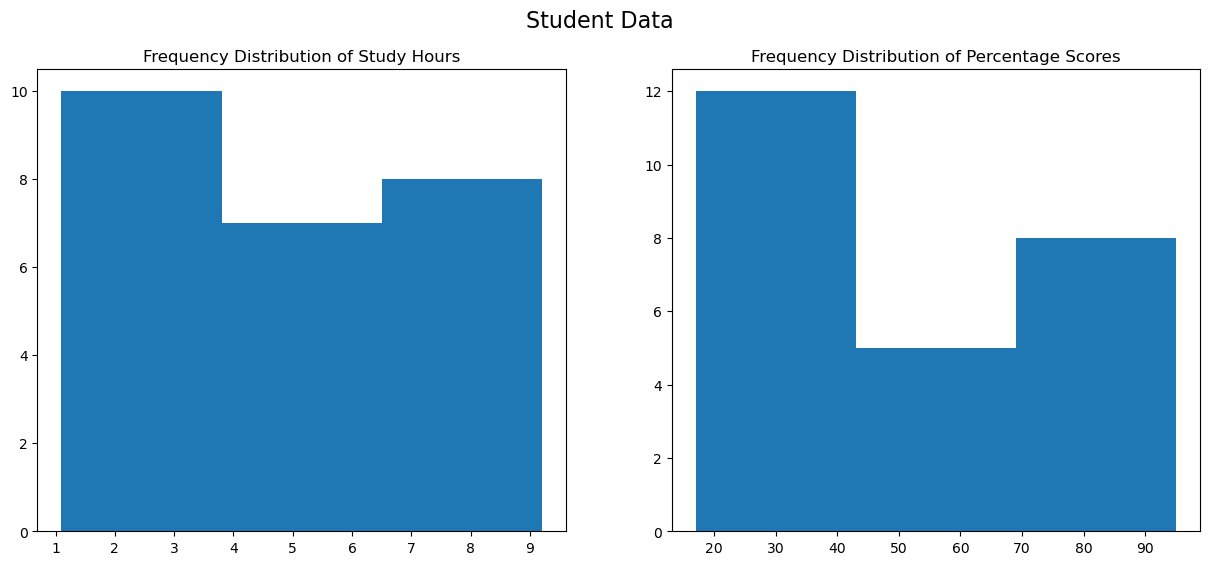

In [8]:
# creating the axes
fig, ax = plt.subplots(1, 2, figsize=(15,6))

# plotting data
ax[0].hist(student_data.Hours, bins=3)
ax[1].hist(student_data.Scores, bins=3)

# customizing plots
ax[0].set(title="Frequency Distribution of Study Hours")
ax[1].set(title="Frequency Distribution of Percentage Scores")

fig.suptitle('Student Data', fontsize=16);

It can be observed that most number of students study between 1 and 4 hours followed by range between 7 to 9 hours

It is also seen that most number of students score between 20 and 42 percentage followed by the range of 70 to 92 percentage

This distribution is different from normal distribution as the graph is a bit left skewed



In [9]:
student_data.Scores.median()

47.0

In [10]:
student_data.Hours.median()

4.8

## ML Model

In [11]:
# data

student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [12]:
# Feature and Label sepration

X = student_data.Hours

y = student_data.Scores

In [13]:
# Split into training and test data
np.random.seed(42)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20,), (5,), (20,), (5,))

In [15]:
np.random.seed(42)
# Training the model

from sklearn.linear_model import LinearRegression

# Instantiate the model
model = LinearRegression()

# Fit data to the estimator
model.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [16]:
# Evaluating the estimator
model.score(X_test.values.reshape(-1,1), y_test)

0.9678055545167994

We can see the accuracy is 96.7%

In [17]:
# Predict the Score of student who studies for 9.25 hours/day

model.predict([[9.25]])

array([92.38611528])

The predicted score of student is 92.39%